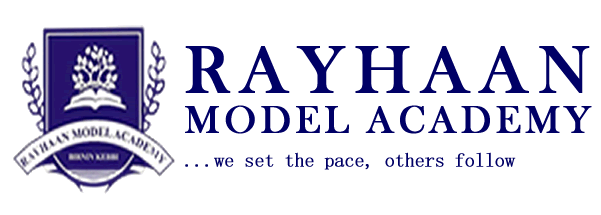
### **Simple Linear Regression Model to Predict Students' Scores Given the Number of Hour(s) of Study**
> In this project, I will be building a simple linear regression model by implementing Python's Scikit Learn (sklearn) package for Machine Learning that can predict the examination score of students of Rayhaan Model Academy given the number of hours they devote to studying (other factors have been held constant, for the sake of simplicity, and to isolate only the effect of study hours)

`Author:` *Ayobami Yusuf*

In [55]:
#importing all needed libraries at once
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [56]:
#reading the dataset and inspection for quality and tidiness
df=pd.read_csv('spark_data.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


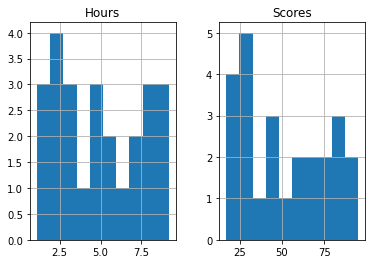

In [58]:
df.hist();

### The dataset  seem clean enough and its variables are well distributed.
#### Next line of action is to observe general trends and relationships to have an idea of what's going on with the data

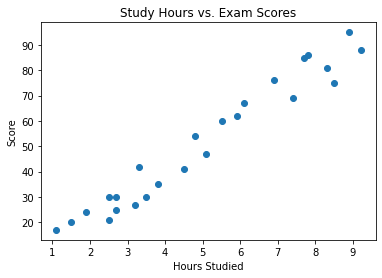

In [59]:
plt.scatter(x=df['Hours'], y=df['Scores'])  
plt.title('Study Hours vs. Exam Scores')  
plt.xlabel('Hours Studied')  
plt.ylabel('Score')  
plt.show()

### There seem to be a posiitive linear relationship between study hours and exam scores. So, it's expected that for higher number of study hours, exam score would be higher. I would build my model on this thesis.
#### I can proceed to pre-process the data for training 

In [60]:
#data segmentation into target(y) and predictor(x)  
#y=df['Scores']
#x=df['Hours']
x = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

#split into train and test datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

### Data preprocessing done. Next up, I train the algorithm on a Linear Regression model, and evaluate the model

In [61]:
model = LinearRegression() 

#fit the relationships
model.fit(x_train, y_train)

print('Training Done')

Training Done


### Now that training is done and a Linear Regression model has been built. I can use this model to predict students' scores given a specific number of hours of study. The linear regression typically is given as:
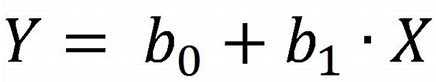

### Where:
- Y = Target Variable (Scores)
- bo = Intercept of the regression model 
- b1 = Slope of the regression model
- X = Predictor Variable (Hours)

In [62]:
#making prediction on the test set (x_test)
y_pred = model.predict(x_test)

In [65]:
#visualzing actual vs predicted values in a dataframe
compare = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred})  
compare 

,Actual Value,Predicted Value
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [67]:
pd.DataFrame(np.c_[x_test,y_test,y_pred], columns=["Hours","Actual Scores","Predicted Scores"])

,Hours,Actual Scores,Predicted Scores
0,1.5,20.0,16.884145
1,3.2,27.0,33.732261
2,7.4,69.0,75.357018
3,2.5,30.0,26.794801
4,5.9,62.0,60.491033


In [72]:
#predicting score of student A
StudentA_StudyHours = [[9.25]]
StudentA_PredictedScore = model.predict(StudentA_StudyHours)
print("Number of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

Number of Hours = [[9.25]]
Predicted Score = 93.69173248737538


> ***If a student (eg Student A) studies for 9 hours, 15 minutes (9.25 hours), the model predicts that such student will attain a score of roughly 93.7*** 
### Evaluating the Model
*Typically, a model is evaluated to access its performance against other models but since this project constrains us to a Linear Regression model, evaluation may not be necessary. But just for the sake of clarity, I would check some evaluation metrics for our model, just to know*

In [73]:
#checking the mean squared error
print('Mean Absolute Error =', mean_absolute_error(y_test, y_pred))

Mean Absolute Error = 4.183859899002975


In [74]:
#checking mean_squared_error
print('Mean Squared Error =', mean_squared_error(y_test, y_pred))

Mean Squared Error = 21.5987693072174


<center>Thank you for reading my Notebook. <a href= "www.linkedin.com/in/ayobami-yusuf"> Click here to connect with me on LinkedIn</a> With ❤️, Ayobami Yusuf</center>